In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
#import torch
#import torch.nn as nn
#import torch.nn.functional as F
#import torch.optim as optim
#import re, string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import string

In [2]:
IMDB = pd.read_csv('processed_reviews.csv')

In [3]:
IMDB.drop('Unnamed: 0', axis=1, inplace = True)
IMDB.head(10)

,review,sentiment,processed_review
0,One of the other reviewers has mentioned that ...,1,one reviewer mention watch 1 oz episode you ll...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,think wonderful way spend time hot summer week...
3,Basically there's a family where a little boy ...,0,basical there s fami little boy jake think the...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visual stunning...
5,"Probably my all-time favorite movie, a story o...",1,probab alltime favorite movie story selflessne...
6,I sure would like to see a resurrection of a u...,1,sure would like see resurrection date seahunt ...
7,"This show was an amazing, fresh & innovative i...",0,show amazing fresh innovative idea 70 first ai...
8,Encouraged by the positive comments about this...,0,encourage positive comment film look forward w...
9,If you like original gut wrenching laughter yo...,1,like original gut wrench laughter like movie y...


In [4]:
with open('positive-words.txt') as f:
    g_lines = f.readlines()
    good = []
    for l in g_lines:
        good_list = l.split('\n')
        good.append(good_list[0]) #list of the positive words
    good_start_index = good.index("a+")
    good = good[good_start_index:]

In [5]:
with open('negative-words.txt') as g:
    b_lines = g.readlines()
    bad = []
    for l in b_lines:
        bad_list = l.split('\n')
        bad.append(bad_list[0]) #list of the negative words
    bad_start_index = bad.index("2-faced")
    bad = bad[bad_start_index:]

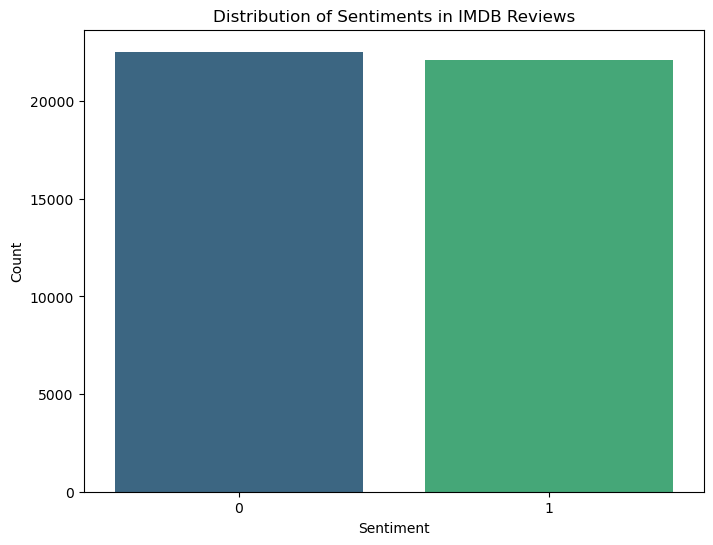

In [6]:
# Create a bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=IMDB, palette='viridis')

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Distribution of Sentiments in IMDB Reviews')

# Show the plot
plt.show()

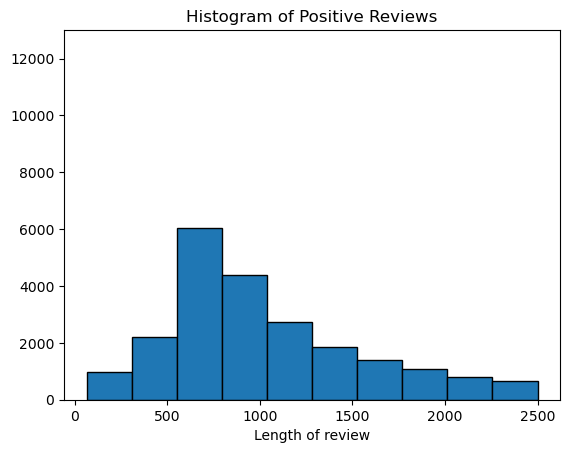

Mean length of positive reviews: 1024.296010121549
Median length of positive reviews: 884.0


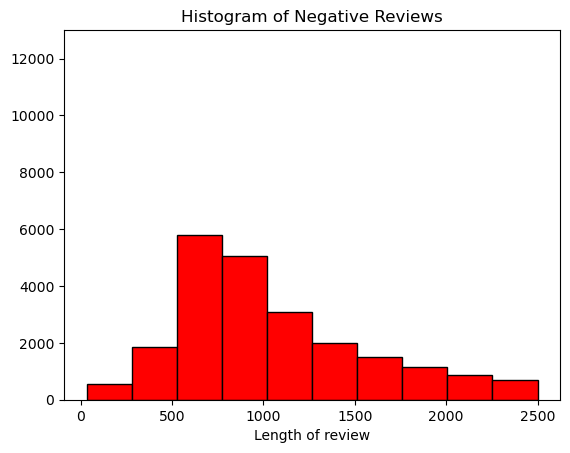

Mean length of negative reviews: 1044.365225880891
Median length of negative reviews: 907.0


In [7]:
positive = IMDB[IMDB['sentiment']== 1]
positive_reviews = positive['review']
positive_reviews = positive_reviews.to_frame() 
positive_store = []

for i in range(len(positive_reviews)):
     positive_store.append((len(positive_reviews.iloc[i,0])))

plt.hist(sorted(positive_store)[:24975], bins=10, edgecolor='black')
plt.title('Histogram of Positive Reviews')
plt.xlabel('Length of review')
plt.ylim(0,13000)
plt.show()
print("Mean length of positive reviews:",sum(positive_store)/len(positive_store))
print("Median length of positive reviews:",np.median(positive_store))

#print(len(positive_store))
#print(sorted(positive_store)[:])

negative = IMDB[IMDB['sentiment']== 0]
negative_reviews = negative['review']
negative_reviews = negative_reviews.to_frame() 
negative_store = []

for i in range(len(negative_reviews)):
     negative_store.append((len(negative_reviews.iloc[i,0])))

plt.hist(sorted(negative_store)[:24975], bins=10, edgecolor='black', color = 'red')
plt.title('Histogram of Negative Reviews')
plt.xlabel('Length of review')
plt.ylim(0,13000)
plt.show()


print("Mean length of negative reviews:",sum(negative_store)/len(negative_store))
print("Median length of negative reviews:",np.median(negative_store))  


In [8]:
from collections import Counter

def count_bad_good_words(text):
    
    
    # Initialize counters
    bad_word_count = 0
    good_word_count = 0
    bad_counts_word = Counter()
    good_counts_word = Counter()

    # Iterate through words and count occurrences
    for word in text.split():
        if word in bad:
            bad_word_count += 1
            bad_counts_word[word] += 1
        elif word in good:
            good_word_count += 1
            good_counts_word[word] += 1

  

    return bad_counts_word, good_counts_word





# Call the function to count bad and good words
IMDB[['bad_counts', 'good_counts']] = IMDB['processed_review'].apply(count_bad_good_words).apply(pd.Series)

# Display the results
print(IMDB[['bad_counts', 'good_counts']])

# Display the results



                                              bad_counts  \
0      {'strike': 2, 'brutality': 1, 'faint': 1, 'tim...   
1                                         {'concern': 1}   
2      {'plot': 1, 'simplistic': 1, 'suspect': 1, 'ki...   
3      {'zombie': 1, 'slow': 1, 'kill': 1, 'ruin': 1,...   
4                        {'loneliness': 1, 'anxious': 1}   
...                                                  ...   
44660                                      {'critic': 1}   
44661  {'bad': 4, 'plot': 1, 'idiotic': 1, 'annoying'...   
44662  {'bad': 1, 'kill': 1, 'figurehead': 1, 'fake':...   
44663  {'disagree': 1, 'excessive': 1, 'vicious': 1, ...   
44664  {'unfortunate': 1, 'muddle': 1, 'implausible':...   

                                             good_counts  
0      {'right': 2, 'trust': 1, 'regard': 1, 'classic...  
1      {'wonderful': 1, 'comforting': 1, 'well': 3, '...  
2      {'wonderful': 1, 'hot': 1, 'witty': 2, 'likabl...  
3                                 {'like': 

In [9]:
IMDB.head(10)

,review,sentiment,processed_review,bad_counts,good_counts
0,One of the other reviewers has mentioned that ...,1,one reviewer mention watch 1 oz episode you ll...,"{'strike': 2, 'brutality': 1, 'faint': 1, 'tim...","{'right': 2, 'trust': 1, 'regard': 1, 'classic..."
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...,{'concern': 1},"{'wonderful': 1, 'comforting': 1, 'well': 3, '..."
2,I thought this was a wonderful way to spend ti...,1,think wonderful way spend time hot summer week...,"{'plot': 1, 'simplistic': 1, 'suspect': 1, 'ki...","{'wonderful': 1, 'hot': 1, 'witty': 2, 'likabl..."
3,Basically there's a family where a little boy ...,0,basical there s fami little boy jake think the...,"{'zombie': 1, 'slow': 1, 'kill': 1, 'ruin': 1,...","{'like': 1, 'well': 1}"
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter matteis love time money visual stunning...,"{'loneliness': 1, 'anxious': 1}","{'love': 1, 'stunning': 1, 'vivid': 1, 'succes..."
5,"Probably my all-time favorite movie, a story o...",1,probab alltime favorite movie story selflessne...,"{'boring': 1, 'midget': 1, 'slow': 1, 'startli...","{'favorite': 1, 'noble': 1, 'delight': 1, 'lik..."
6,I sure would like to see a resurrection of a u...,1,sure would like see resurrection date seahunt ...,{'doubt': 1},"{'like': 2, 'excitement': 1, 'heros': 1, 'work..."
7,"This show was an amazing, fresh & innovative i...",0,show amazing fresh innovative idea 70 first ai...,"{'funny': 1, 'decline': 1, 'waste': 1, 'disgra...","{'amazing': 1, 'fresh': 1, 'innovative': 1, 'b..."
8,Encouraged by the positive comments about this...,0,encourage positive comment film look forward w...,"{'bad': 1, 'mistake': 1, 'worst': 1, 'awful': ...","{'encourage': 1, 'positive': 1, 'happy': 1, 'g..."
9,If you like original gut wrenching laughter yo...,1,like original gut wrench laughter like movie y...,{'hell': 1},"{'like': 3, 'love': 1}"


In [10]:
#IMDB.to_csv('final_data.csv')

In [11]:
from sklearn.decomposition import PCA
import numpy as np

new = IMDB['processed_review']
compile_bad_dicts = []
compile_good_dicts = []
for i in range(100):
    compile_bad_dicts.append(dict(new.iloc[i][1]))
    compile_good_dicts.append(dict(new.iloc[i][2]))

df_bad = (pd.DataFrame(compile_bad_dicts).fillna(0).astype(int))
df_good = (pd.DataFrame(compile_good_dicts).fillna(0).astype(int))



print(df_bad)
print(df_good)

pca_good = PCA(n_components=100)
df_good_pca = pca_good.fit_transform(df_good)
var_explained_good = pca_good.explained_variance_ratio_
var_cumulative_good = np.cumsum(var_explained_good)
plt.plot(var_cumulative_good)
plt.title("Cumulative Variance Explained for Positive Review Words")
plt.xlabel("Principal Component Index")
plt.ylabel("Cumulative Variance Explained")



pca_bad = PCA(n_components=100)
df_bad_pca_bad = pca_bad.fit_transform(df_bad)
var_explained_bad = pca_bad.explained_variance_ratio_
var_cumulative_bad = np.cumsum(var_explained_bad)
plt.figure()
plt.plot(var_cumulative_bad)
plt.title("Cumulative Variance Explained for Negative Review Words")
plt.xlabel("Principal Component Index")
plt.ylabel("Cumulative Variance Explained")

ValueError: dictionary update sequence element #0 has length 1; 2 is required

In [ ]:
len(IMDB['processed_review'])